# Visualizing KG statistics
In this notebook, we will be visualizing statistics about the KG generated with DyGIE++, as well as statistics about the corpus from which the graphs were generated: number of docs, words per doc, mean/median number of predictions (entities and relations) for each model, number of unique entities overall, mean/median number of predictions for each doc, as well as plotting the softmax scores for predictions from each model. 

In [1]:
import pandas as pd
import jsonlines

from statistics import mean, median
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the prediction files
scierc_results = []
with jsonlines.open('../data/first_manuscript_data/dygiepp/pretrained_output/noPunct_SciERC_predictions.jsonl') as reader:
    for obj in reader:
        scierc_results.append(obj)
        
ace05_results = []
with jsonlines.open('../data/first_manuscript_data/dygiepp/pretrained_output/noPunct_ACE05_predictions.jsonl') as reader:
    for obj in reader:
        ace05_results.append(obj)

## Application corpus statistics
---------------------
### Number of docs
There is one json object in the prediction file per document. The same set of docs was used to build both graphs.

In [3]:
print(f'{len(scierc_results)} documents were used to build the graphs.')

8000 documents were used to build the graphs.


### Total sentences & sentences per doc, total words & words per doc
Each object contains a list of lists, where each internal list is a sentence, and list elements are sentence tokens. This includes periods -- will not subtract these from the count, since the model considers them to be words.

In [4]:
# Sentences
## Get number of sentences in each doc
num_sent_in_docs = []
for doc in scierc_results:
    num_sent_in_docs.append(len(doc['sentences']))
    
## Calculate stats
total_sent = sum(num_sent_in_docs)
mean_sent_per_doc = mean(num_sent_in_docs)
median_sent_per_doc = median(num_sent_in_docs)
largest_doc = max(num_sent_in_docs)
smallest_doc = min(num_sent_in_docs)

print(f'{total_sent} sentences were used to build the graphs.')
print(f'There are an average of {mean_sent_per_doc:.2f} sentences per doc, and a median value of {median_sent_per_doc} sentences per doc.')
print(f'The largest doc has {largest_doc} sentences, and the smallest doc has {smallest_doc}.')

77719 sentences were used to build the graphs.
There are an average of 9.71 sentences per doc, and a median value of 10.0 sentences per doc.
The largest doc has 32 sentences, and the smallest doc has 1.


In [5]:
# Words
## Get number of words in each doc
num_words_in_docs = []
for doc in scierc_results:
    num_words = 0
    for sentence in doc['sentences']:
        num_words += len(sentence)
    num_words_in_docs.append(num_words)
    
## Calculate stats
total_words = sum(num_words_in_docs)
mean_words_per_doc = mean(num_words_in_docs)
median_words_per_doc = median(num_words_in_docs)
longest_doc = max(num_words_in_docs)
shortest_doc = min(num_words_in_docs)

print(f'There are a total of {total_words} in the documents used to build the graph.')
print(f'There are an average of {mean_words_per_doc:.2f} words per doc, and a median value of {median_words_per_doc}')
print(f'The longest doc has {longest_doc} words, and the shortest doc has {shortest_doc}.')

There are a total of 1700963 in the documents used to build the graph.
There are an average of 212.62 words per doc, and a median value of 212.0
The longest doc has 621 words, and the shortest doc has 7.


#### Plotting
Plotting boxplots for number of words and sentences per document

Text(0, 0.5, 'Number of sentences')

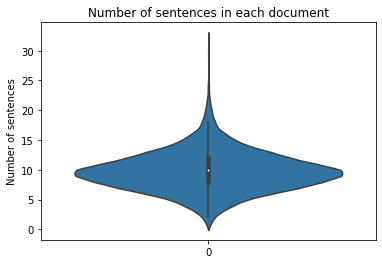

In [30]:
# Sentences per document 
ax = sns.violinplot(data=num_sent_in_docs)
ax.set_title('Number of sentences in each document')
ax.set_ylabel('Number of sentences')

Text(0, 0.5, 'Number of words')

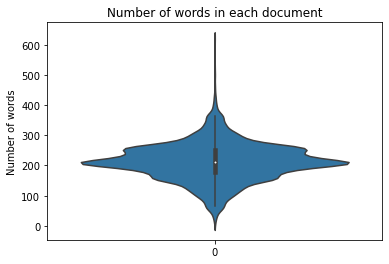

In [7]:
# Words per document 
ax = sns.violinplot(data=num_words_in_docs)
ax.set_title('Number of words in each document')
ax.set_ylabel('Number of words')

## Graph statistics
----------------------
### Mean & median numbers of predictions, overall and per doc
We want to see how many predictions each model made, overall and on a per doc basis. Will get numbers as well as making plots.


In [8]:
def get_pred_ent_stats(pred_list, model_name):
    """
    Get prediction statistics for model output for NER only. 
    
    parameters:
        pred_list, list of dict: json objects from dygiepp output
        model_name, str: name of model. Should have suffix of '_ents'
        
    returns:
        stats_df, df: columns are model_name | stats...
    """
    abs_num_preds = []
    num_ents_norm_sents = []
    num_ents_norm_words = []
    for doc in pred_list:

        num_preds = sum([len(sentence) for sentence in doc['predicted_ner']])
        num_sents = len(doc['sentences'])
        num_words = sum([len(sentence) for sentence in doc['sentences']])

        abs_num_preds.append(num_preds)
        num_ents_norm_sents.append(num_preds/num_sents)
        num_ents_norm_words.append(num_preds/num_words)

    ### Statistics
    stats = {}
    stats['model_name'] = model_name
    stats['total_preds'] = sum(abs_num_preds)
    stats['mean_norm_sents'] = mean(num_ents_norm_sents)
    stats['mean_norm_words'] = mean(num_ents_norm_words)
    stats['median_norm_sents'] = median(num_ents_norm_sents)
    stats['median_norm_words'] = median(num_ents_norm_words)
    stats['least_norm_sents'] = min(num_ents_norm_sents)
    stats['least_norm_words'] = min(num_ents_norm_words)
    stats['greatest_norm_sents'] = max(num_ents_norm_sents)
    stats['greatest_norm_words'] = max(num_ents_norm_words)

    print(f'Total predictions: {stats["total_preds"]}')
    print(f'Mean predictions per doc, normalized by number of sentences: {stats["mean_norm_sents"]:.2f} predictions per sentence')
    print(f'Mean predictions per doc, normalized by number of words: {stats["mean_norm_words"]:.2f} predictions per word')
    print(f'Median predictions per doc, normalized by number of sentences: {stats["median_norm_sents"]:.2f} predictions per sentence')
    print(f'Median predictions per doc, normalized by number of words: {stats["median_norm_words"]:.2f} predictions per word')
    print(f'Least number of predictions per doc, normalized by number of sentences: {stats["least_norm_sents"]:.2f} predictions per sentence')
    print(f'Least number of predictions per doc, normalized by number of sentences: {stats["least_norm_words"]:.2f} predictions per word')
    print(f'Greatest number of predictions per doc, normalized by number of sentences: {stats["greatest_norm_sents"]:.2f} predictions per sentence')
    print(f'Greatest number of predictions per doc, normalized by number of sentences: {stats["greatest_norm_words"]:.2f} predictions per word')

    for key, value in stats.items():
        stats[key] = [value]
    
    stats_df = pd.DataFrame(stats)
    
    return stats_df

In [9]:
# Entities 
## SciERC
scierc_ent_stats = get_pred_ent_stats(scierc_results, 'scierc_entities')

Total predictions: 237206
Mean predictions per doc, normalized by number of sentences: 3.14 predictions per sentence
Mean predictions per doc, normalized by number of words: 0.14 predictions per word
Median predictions per doc, normalized by number of sentences: 3.10 predictions per sentence
Median predictions per doc, normalized by number of words: 0.14 predictions per word
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per sentence
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per word
Greatest number of predictions per doc, normalized by number of sentences: 10.00 predictions per sentence
Greatest number of predictions per doc, normalized by number of sentences: 0.25 predictions per word


In [10]:
scierc_ent_stats

,model_name,total_preds,mean_norm_sents,mean_norm_words,median_norm_sents,median_norm_words,least_norm_sents,least_norm_words,greatest_norm_sents,greatest_norm_words
0,scierc_entities,237206,3.140487,0.139492,3.1,0.139423,0.0,0.0,10.0,0.253968


In [11]:
## ACE05
ace05_ent_stats = get_pred_ent_stats(ace05_results, 'ace05_entities')

Total predictions: 82670
Mean predictions per doc, normalized by number of sentences: 1.09 predictions per sentence
Mean predictions per doc, normalized by number of words: 0.05 predictions per word
Median predictions per doc, normalized by number of sentences: 1.00 predictions per sentence
Median predictions per doc, normalized by number of words: 0.05 predictions per word
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per sentence
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per word
Greatest number of predictions per doc, normalized by number of sentences: 5.10 predictions per sentence
Greatest number of predictions per doc, normalized by number of sentences: 0.20 predictions per word


In [12]:
ace05_ent_stats

,model_name,total_preds,mean_norm_sents,mean_norm_words,median_norm_sents,median_norm_words,least_norm_sents,least_norm_words,greatest_norm_sents,greatest_norm_words
0,ace05_entities,82670,1.090901,0.048298,1.0,0.045872,0.0,0.0,5.1,0.2


In [13]:
# Relations (triples)
def get_pred_rels_stats(pred_list, model_name):
    """
    Get prediction statistics for model output for triples only. 
    
    parameters:
        pred_list, list of dict: json objects from dygiepp output
        model_name, str: name of model. Should have suffix of '_rels'
        
    returns:
        stats_df, df: columns are model_name | stats...
    """
    abs_num_preds = []
    num_rels_norm_sents = []
    num_rels_norm_words = []
    for doc in pred_list:

        num_preds = sum([len(sentence) for sentence in doc['predicted_relations']])
        num_sents = len(doc['sentences'])
        num_words = sum([len(sentence) for sentence in doc['sentences']])

        abs_num_preds.append(num_preds)
        num_rels_norm_sents.append(num_preds/num_sents)
        num_rels_norm_words.append(num_preds/num_words)

    ### Statistics
    stats = {}
    stats['model_name'] = model_name
    stats['total_preds'] = sum(abs_num_preds)
    stats['mean_norm_sents'] = mean(num_rels_norm_sents)
    stats['mean_norm_words'] = mean(num_rels_norm_words)
    stats['median_norm_sents'] = median(num_rels_norm_sents)
    stats['median_norm_words'] = median(num_rels_norm_words)
    stats['least_norm_sents'] = min(num_rels_norm_sents)
    stats['least_norm_words'] = min(num_rels_norm_words)
    stats['greatest_norm_sents'] = max(num_rels_norm_sents)
    stats['greatest_norm_words'] = max(num_rels_norm_words)

    print(f'Total predictions: {stats["total_preds"]}')
    print(f'Mean predictions per doc, normalized by number of sentences: {stats["mean_norm_sents"]:.2f} predictions per sentence')
    print(f'Mean predictions per doc, normalized by number of words: {stats["mean_norm_words"]:.2f} predictions per word')
    print(f'Median predictions per doc, normalized by number of sentences: {stats["median_norm_sents"]:.2f} predictions per sentence')
    print(f'Median predictions per doc, normalized by number of words: {stats["median_norm_words"]:.2f} predictions per word')
    print(f'Least number of predictions per doc, normalized by number of sentences: {stats["least_norm_sents"]:.2f} predictions per sentence')
    print(f'Least number of predictions per doc, normalized by number of sentences: {stats["least_norm_words"]:.2f} predictions per word')
    print(f'Greatest number of predictions per doc, normalized by number of sentences: {stats["greatest_norm_sents"]:.2f} predictions per sentence')
    print(f'Greatest number of predictions per doc, normalized by number of sentences: {stats["greatest_norm_words"]:.2f} predictions per word')

    for key, value in stats.items():
        stats[key] = [value]
    
    stats_df = pd.DataFrame(stats)
    
    return stats_df

In [14]:
## SciERC
scierc_rels_stats = get_pred_rels_stats(scierc_results, 'scierc_relations')

Total predictions: 65338
Mean predictions per doc, normalized by number of sentences: 0.87 predictions per sentence
Mean predictions per doc, normalized by number of words: 0.04 predictions per word
Median predictions per doc, normalized by number of sentences: 0.78 predictions per sentence
Median predictions per doc, normalized by number of words: 0.04 predictions per word
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per sentence
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per word
Greatest number of predictions per doc, normalized by number of sentences: 5.00 predictions per sentence
Greatest number of predictions per doc, normalized by number of sentences: 0.28 predictions per word


In [15]:
## ACE05
ace05_rels_stats = get_pred_rels_stats(ace05_results, 'ace05_relations')

Total predictions: 1040
Mean predictions per doc, normalized by number of sentences: 0.01 predictions per sentence
Mean predictions per doc, normalized by number of words: 0.00 predictions per word
Median predictions per doc, normalized by number of sentences: 0.00 predictions per sentence
Median predictions per doc, normalized by number of words: 0.00 predictions per word
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per sentence
Least number of predictions per doc, normalized by number of sentences: 0.00 predictions per word
Greatest number of predictions per doc, normalized by number of sentences: 1.50 predictions per sentence
Greatest number of predictions per doc, normalized by number of sentences: 0.08 predictions per word


#### Plotting
Making two plots, one for normalization by sentences and another for normalization by words. There will be 4 items on each plot, two for each model, one rels and one ents. Each dot in the plot represents one document. Swarmplot was too computationally intensive and too big to be interpretable, so there aren't actually dots -- would have preferred to do violin plots here, but they don't come out as interpretable either for some reason here.

In [16]:
def get_plot_data(pred_list, model_name):
    """
    Get data for plots.
    
    paramters:
        pred_list, list of dict: list of json objects from dygiepp output
        model_name, str: name of model (no suffix)
        
    returns:
        plot_data, dict: keys are f'{model_name}_rels', f'{model_name}_ents', values are lists of data points
    """
    # Get entity data
    num_ents_norm_sents = []
    num_ents_norm_words = []
    
    for doc in pred_list:

        num_preds = sum([len(sentence) for sentence in doc['predicted_ner']])
        num_sents = len(doc['sentences'])
        num_words = sum([len(sentence) for sentence in doc['sentences']])

        num_ents_norm_sents.append(num_preds/num_sents)
        num_ents_norm_words.append(num_preds/num_words)
        
    # Get relation data
    num_rels_norm_sents = []
    num_rels_norm_words = []
    
    for doc in pred_list:

        num_preds = sum([len(sentence) for sentence in doc['predicted_relations']])
        num_sents = len(doc['sentences'])
        num_words = sum([len(sentence) for sentence in doc['sentences']])

        num_rels_norm_sents.append(num_preds/num_sents)
        num_rels_norm_words.append(num_preds/num_words)
        
    # Make dict
    plot_data = {f'{model_name}_ents_norm_sents':num_ents_norm_sents,
                f'{model_name}_ents_norm_words':num_ents_norm_words,
                f'{model_name}_rels_norm_sents':num_rels_norm_sents,
                f'{model_name}_rels_norm_words':num_rels_norm_words}
    
    return plot_data

In [17]:
# Get plot data
scierc_plot_data = get_plot_data(scierc_results, 'scierc')
ace05_plot_data = get_plot_data(ace05_results, 'ace05')

Text(0, 0.5, '# predictions / # of sentences in doc')

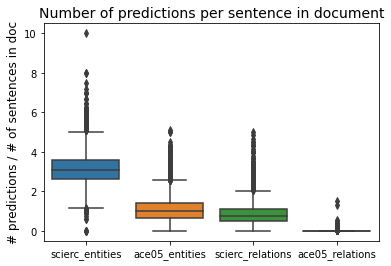

In [28]:
# Sentence plot 
## Make dtaframe 
sentence_df = pd.DataFrame({'scierc_entities':scierc_plot_data['scierc_ents_norm_sents'],
                           'ace05_entities':ace05_plot_data['ace05_ents_norm_sents'],
                           'scierc_relations':scierc_plot_data['scierc_rels_norm_sents'],
                           'ace05_relations':ace05_plot_data['ace05_rels_norm_sents']})

## Make plot
ax = sns.boxplot(data=sentence_df)
ax.set_title('Number of predictions per sentence in document', fontsize=14)
ax.set_ylabel('# predictions / # of sentences in doc', fontsize=12)

Text(0, 0.5, '# predictions / # of words in doc')

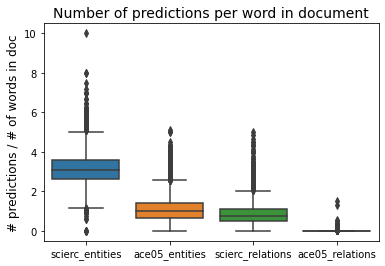

In [27]:
# Word plot 
## Make dtaframe 
words_df = pd.DataFrame({'scierc_entities':scierc_plot_data['scierc_ents_norm_words'],
                           'ace05_entities':ace05_plot_data['ace05_ents_norm_words'],
                           'scierc_relations':scierc_plot_data['scierc_rels_norm_words'],
                           'ace05_relations':ace05_plot_data['ace05_rels_norm_words']})

## Make plot
ax = sns.boxplot(data=sentence_df)
ax.set_title('Number of predictions per word in document', fontsize=14)
ax.set_ylabel('# predictions / # of words in doc', fontsize=12)

Also want to plot a bar plot with the total numbers of each type of prediction for each model.

In [20]:
# Get numbers for each
stats_dict = {}
for model_stat_df in [scierc_ent_stats, ace05_ent_stats, scierc_rels_stats, ace05_rels_stats]:
    stats_dict[model_stat_df['model_name'].loc[0]] = [model_stat_df['total_preds'].loc[0]]
    
total_stats_df = pd.DataFrame(stats_dict)
total_stats_df

,scierc_entities,ace05_entities,scierc_relations,ace05_relations
0,237206,82670,65338,1040


Text(0, 0.5, 'Total number of predictions')

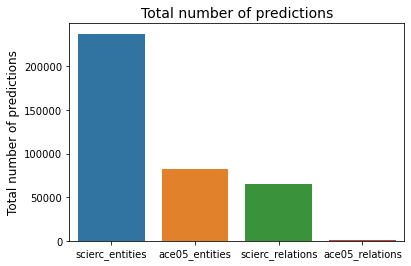

In [21]:
# Plot 
ax = sns.barplot(data=total_stats_df)
ax.set_title('Total number of predictions', fontsize=14)
ax.set_ylabel('Total number of predictions', fontsize=12)

### Number of unique entities
Want to see how many of the total predicted entities (from ner and relations) are unique.

### Softmax scores
Softmax scores represent how confident the model is about its predictions. Unclear whether this is the confidence in predicting the span as an entity or in predicting its type. Each "dot" in the plot represents one prediction.

In [22]:
def get_softmax(pred_list):
    """
    Gets the softmax scores for a model's predictions of entities and relations.
    
    parameters:
        pred_list, list of dict: dygiepp output
        
    returns:
        (ents_softmax, rels_softmax), two lists: softmax scores for predictions of entities and relations, 
            respectively.
    """
    # Get entity prediction softmax scores 
    ents_softmax = []
    for doc in pred_list:
        for sentence in doc['predicted_ner']:
            for ent_pred in sentence:
                ents_softmax.append(ent_pred[-1])
                
    # Get relation prediction softmax scores
    rels_softmax = []
    for doc in pred_list:
        for sentence in doc['predicted_relations']:
            for rel_pred in sentence:
                rels_softmax.append(rel_pred[-1])
                
    return ents_softmax, rels_softmax

In [23]:
# Get softmax scores
scierc_ents_softmax, scierc_rels_softmax = get_softmax(scierc_results)
ace05_ents_softmax, ace05_rels_softmax = get_softmax(ace05_results)

Text(0, 0.5, 'Softmax score')

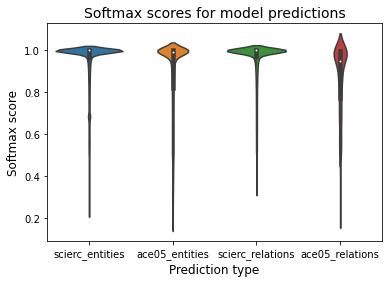

In [24]:
# Plot 
## Make dataframe
lists =  [scierc_ents_softmax, ace05_ents_softmax, scierc_rels_softmax, ace05_rels_softmax]
list_names = ['scierc_entities', 'ace05_entities', 'scierc_relations', 'ace05_relations']
index_col = []
softmax_col = []
for name, data in zip(list_names, lists):
    for item in data:
        index_col.append(name)
        softmax_col.append(item)

long_softmax_df = pd.DataFrame({'prediction_type':index_col, 'softmax_score':softmax_col})

## Make plot
ax = sns.violinplot(x='prediction_type', y='softmax_score', data=long_softmax_df)
ax.set_title('Softmax scores for model predictions', fontsize=14)
ax.set_xlabel('Prediction type', fontsize=12)
ax.set_ylabel('Softmax score', fontsize=12)

In [25]:
# Get mean and median for each 
grouped_df = long_softmax_df.groupby('prediction_type')
grouped_df.mean()

,softmax_score
prediction_type,
ace05_entities,0.883853
ace05_relations,0.867150
scierc_entities,0.940701
scierc_relations,0.948415


In [26]:
grouped_df.median()

,softmax_score
prediction_type,
ace05_entities,0.9921
ace05_relations,0.9469
scierc_entities,0.9998
scierc_relations,0.9997
